# Modeling
In this notebook, we'll be modeling the data we've previously prepared. Out notebook will be laid out as follows:

1. Model Selection & Generation
2. Hyperparameter Optimization
3. Fine-Tuning (if needed)
4. Reporting Best Model(s) + Settings
5. Interpretation
6. Conclusion

Our eventual goal here is two-fold:

1. Accurately [and fairly] model the diabetes dataset
2. Interpret the results to find something worth recommending to those wanting to reduce risk of diabetes. This can be via LIME/SHAP (i.e. some interpretable model that approximates the neural network) or via analyzing a more simple model's structure (i.e. regression coefficients, random forest decision boundaries)

In [1]:
# Environment Setup
from utils.model import *
from utils.dataset import *

***
## Model Selection & Generation

<Train-Test Split Report>
Train: 512886 obs, 170962 no diabetes [0], 170962 pre-diabetes [1], 170962 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]
<Train-Test Split Report>
Train: 512886 obs, 170962 no diabetes [0], 170962 pre-diabetes [1], 170962 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]
<Train-Test Split Report>
Train: 512886 obs, 170962 no diabetes [0], 170962 pre-diabetes [1], 170962 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]
<Model Selected> :: tree-classifier-[p_0.4366]-[r_0.5043]-[f_0.4296]-[a_67.3407]


/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



<Test Report>
Precision: [no diabetes] 0.9407131011608624, [pre-diabetes] 0.02788074133763094, [diabetes] 0.34125237191650853
Recall: [no diabetes] 0.6901335953768045, [pre-diabetes] 0.18682505399568033, [diabetes] 0.6360164096760503
F1-Score: [no diabetes] 0.7961725845850709, [pre-diabetes] 0.048520544103211334, [diabetes] 0.4441809918988342
Support: [no diabetes] 42741, [pre-diabetes] 926, [diabetes] 7069
Accuracy: 67.3407%
Macro-F1: 0.4296


/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


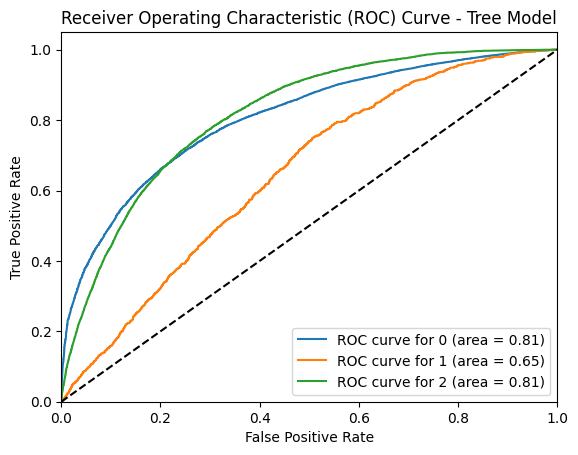

<Model Selected> :: ffnn-classifier-[p_0.4275]-[r_0.4934]-[f_0.4320]-[a_70.9831]

<Test Report>
Precision: [no diabetes] 0.9334705689310541, [pre-diabetes] 0.03458096013018715, [diabetes] 0.3143844433904736
Recall: [no diabetes] 0.7320605507592242, [pre-diabetes] 0.091792656587473, [diabetes] 0.6563870420144292
F1-Score: [no diabetes] 0.8205874639391555, [pre-diabetes] 0.050236406619385346, [diabetes] 0.4251420194245923
Support: [no diabetes] 42741, [pre-diabetes] 926, [diabetes] 7069
Accuracy: 70.9831%
Macro-F1: 0.4320


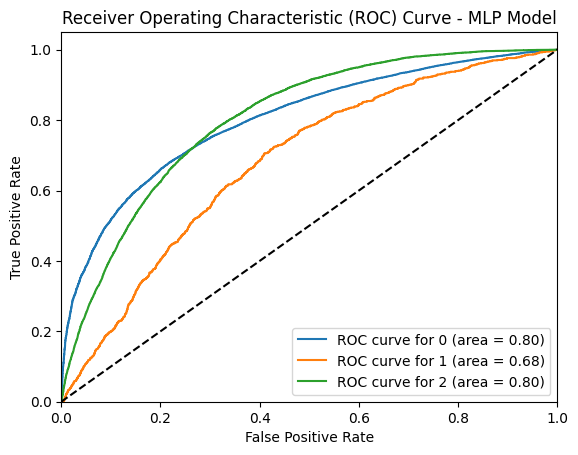

<Model Selected> :: log-classifier-[p_0.4394]-[r_0.5193]-[f_0.4118]-[a_60.7912]

<Test Report>
Precision: [no diabetes] 0.9571128550900851, [pre-diabetes] 0.028437468147997146, [diabetes] 0.3327771329077191
Recall: [no diabetes] 0.6077770758756229, [pre-diabetes] 0.30129589632829373, [diabetes] 0.6488895176121092
F1-Score: [no diabetes] 0.7434532497638877, [pre-diabetes] 0.051969823973176864, [diabetes] 0.43993669975543087
Support: [no diabetes] 42741, [pre-diabetes] 926, [diabetes] 7069
Accuracy: 60.7912%
Macro-F1: 0.4118


/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


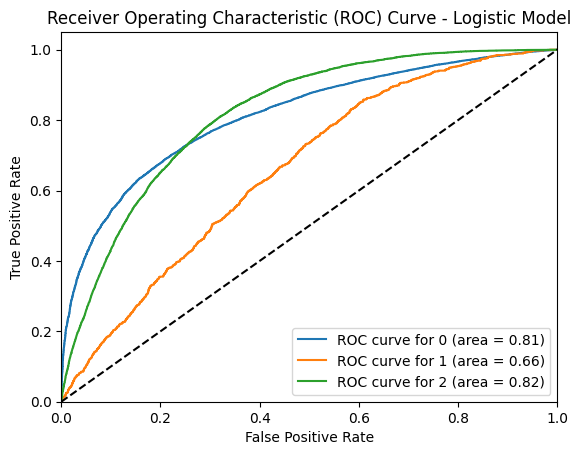

In [2]:
# generate lookup for models
models = {
    "tree": TreeClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=True),
    "ffnn": MLPClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=True, loss_balance=False),
    "log": LogClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=True)
}

# manual search
# models["tree"].set_hyperparams({
#     "loss": "log_loss",
#     "learning_rate": 0.01,
#     "n_estimators": 100,
#     "criterion": "friedman_mse",
#     "min_samples_split": 5,
#     "min_samples_leaf": 5,
#     "max_depth": 8,
#     "n_iter_no_change": 5,
#     "max_features": "sqrt",
#     "tol": 0.0001
# })
# models["ffnn"].set_hyperparams({
#     "input_size": 21,
#     "output_size": 3,
#     "hidden_size": 128,
#     "num_hidden": 4,
#     "num_epochs": 50,
#     "batch_size": 32,
#     "learning_rate": 0.00005,
#     "dropout_rate": 0.5,
#     "classify_fn": "sigmoid"
# })

# train & test basic model
skip_models = []# ["log", "ffnn", "tree"]
for mt, model in models.items():
    # attempt to load, else train and test
    if (mt in skip_models) or (not model.load_model()):
        model.train_model(verbose=2)
    model.test_model()

***
## Hyperparameter Optimization

In [3]:
"""
Commented out since this takes a very long time to run; experiments with 
different settings for all models.
"""
# # optimize hyperparams
# optimizer_results = {model_type: model.optimize_hyperparams(kfold=2) for model_type, model in models.items()}
# print(optimizer_results)

'\nCommented out since this takes a very long time to run; experiments with \ndifferent settings for all models.\n'

***
## Up-Sampling Breakdown

In [ ]:
# define model strategies to try
models = {
    "smote": MLPClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=True, loss_balance=False),
    "bootstrap": MLPClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=True, use_smote=False, loss_balance=False),
    "loss": MLPClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet", upsample=False, loss_balance=True)
}

for strat, model in models.items():
    # breakdown
    model.train_model(verbose=1)

    print(f"\n\n<breakdown> for {strat} trial")
    model.test_model()

***
## Interpretation

In [4]:
# Logistic-Approximation for Deep Learner
models["log"].explain_model()

{'high_bp': -0.23327178047453906,
 'high_chol': -0.334126644121848,
 'chol_check': -0.15132506947633687,
 'bmi': -0.40283705380462403,
 'smoker': 0.0,
 'stroke': 0.0,
 'heart_disease': 0.0,
 'physical_activity': 0.004631891965842328,
 'fruits': 0.040052444835019095,
 'veggies': 0.0,
 'heavy_drinker': 0.05994501018275364,
 'healthcare': 0.0,
 'no_doc_bc_cost': -0.05123929528640953,
 'general_health': -0.639927900219654,
 'mental_health': 0.014953609073340198,
 'physical_health': 0.1436857442771119,
 'diff_walk': 0.0,
 'sex': -0.024910195125215147,
 'age': -0.4073858118266818,
 'education': 0.08061386743733419,
 'income': 0.0226290781615139}

We can observe some features that don't really matter (for the logistic model), as well as the features and how they affect the eventual prediction downstream. The higher the coefficient's magnitude, the more important it is. The sign represents the increase (negative) in risk versus decrease (positive) in risk.